In [1]:
#connection au drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
#bibliothèques dont nous aurons besoin

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score


In [17]:
#lire les données en dataframes

train= pd.read_csv('/content/drive/MyDrive/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/test.csv')

In [18]:
#visualiser les 10 premières lignes de la dataframe train

train.head(10)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.00000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.00000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.00000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.00000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.031250
5,8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.0,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.00000,0.000000,0.000000,0.001953,0.013672
6,10,Quercus_Canariensis,0.021484,0.031250,0.017578,0.009766,0.001953,0.042969,0.039062,0.0,...,0.085938,0.000000,0.040039,0.000000,0.009766,0.00000,0.000000,0.000000,0.039062,0.003906
7,11,Quercus_Rubra,0.000000,0.000000,0.037109,0.050781,0.003906,0.000000,0.003906,0.0,...,0.038086,0.025391,0.009766,0.002930,0.021484,0.00000,0.037109,0.006836,0.002930,0.036133
8,14,Quercus_Brantii,0.005859,0.001953,0.033203,0.015625,0.001953,0.000000,0.023438,0.0,...,0.000000,0.000000,0.008789,0.000000,0.017578,0.00000,0.000000,0.000977,0.033203,0.074219
9,15,Salix_Fragilis,0.000000,0.000000,0.009766,0.037109,0.072266,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.070312,0.013672,0.19238,0.000000,0.074219,0.000000,0.000000


In [19]:
#Apperçu des shape de train et test

print(train.shape)
print(test.shape)

(990, 194)
(594, 193)


In [20]:
#nombre de classes distinctes

train['species'].nunique()

99

## DATA PREPROCESSING

In [21]:
#importations utiles

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit 

In [22]:
# Label Encoding function

def Labels_encode(train,test):
    L_encoder = LabelEncoder().fit(train.species)
    Train = train.drop(['species','id'],axis = 1) 
    Test = test.drop(['id'],axis = 1)
    Labels = L_encoder.transform(train.species)
    Ids_Test = test.id
    Classes = list(L_encoder.classes_) 
    return Train, Test,Labels,Ids_Test, Classes 

Train, Test,Labels,Ids_Test, Classes = Labels_encode(train,test)

In [23]:
Train.head()


,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [24]:
#Le shape change du train vu précédemment car nous avons droppé la colonne 'id' et 'species'
Train.shape

(990, 192)

In [25]:
#Après encoding voici les labels dont nous disposons
Labels

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 84, 13, 66, 15,  6, 73, 22, 73, 31, 36, 27, 94, 88,
       12, 28, 21, 25, 20, 60, 84, 65, 69, 58, 23, 76, 18, 52, 54,  9, 48,
       47, 64, 81, 83, 36, 58, 21, 81, 20, 62, 88, 34, 92, 79, 82, 20, 32,
        4, 84, 36, 35, 72, 60, 71, 72, 52, 50, 54, 11, 51, 18, 47,  5,  8,
       37, 97, 20, 33,  1, 59,  1, 56,  1,  9, 57, 20, 79, 29, 16, 32, 54,
       93, 10, 46, 59, 84, 76, 15, 10, 15,  0, 69,  4, 51, 51, 94, 36, 39,
       62,  2, 24, 26, 35, 25, 87,  0, 55, 34, 38,  1, 45,  7, 93, 56, 38,
       21, 51, 75, 81, 74, 33, 20, 37,  9, 40, 60, 31, 83, 50, 71, 67, 30,
       66,  1, 43, 61, 23, 65, 84, 87, 46, 57, 16,  2, 28, 12, 96, 44, 76,
       29, 75, 41, 87, 67, 61, 30,  5, 12, 62,  3, 83, 81,  6, 85,  4, 37,
       57, 84, 39, 71, 61,  6, 76, 14, 31, 98, 40, 17, 51, 16, 42, 63, 86,
       37, 69, 86, 71, 80, 78, 14, 35, 25,  5, 39,  8,  9, 26, 44, 60, 13,
       14, 77, 13, 80, 87

In [26]:
#Ici nous avons procéder à la stratification
X = Train.values
Y = Labels
Strat = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=30)
Strat.get_n_splits(X, Y)

10

In [27]:
for Training_indice,Testing_indice in Strat.split(X, Y):
    X_Train, X_Test = X[Training_indice], X[Testing_indice]
    Y_Train, Y_Test = Y[Training_indice], Y[Testing_indice]

In [38]:
# importing libraries
models = [
    KNeighborsClassifier(n_neighbors=1,weights='distance',algorithm='ball_tree',leaf_size=10,p=1),
    SVC(kernel='linear',C = 100,gamma=0.0001),
    RandomForestClassifier(n_estimators=350,max_depth=30),
    GaussianNB(var_smoothing=0.002),
    AdaBoostClassifier(n_estimators=70,learning_rate=0.01),
    MLPClassifier(hidden_layer_sizes=90,learning_rate_init=0.01,solver='adam',activation='tanh'),
    SGDClassifier(loss='hinge',penalty= 'l1'),
    LinearDiscriminantAnalysis(solver='svd',tol=0.1)
]

In [39]:
col=["Model", "Accuracy"] 
L = pd.DataFrame(columns=col)

for c_model in models:
    c_model.fit(X_Train, Y_Train)  
    name = c_model.__class__.__name__
    training_predictions = c_model.predict(X_Test)   
    accuracy = accuracy_score(Y_Test, training_predictions) 
    print(name+" " +"Accuracy is: {:.2%}".format(accuracy))
    
    df_L = pd.DataFrame([[name, accuracy*100]], columns=col) 
    L = L.append(df_L) 
    

KNeighborsClassifier Accuracy is: 95.45%
SVC Accuracy is: 95.45%
RandomForestClassifier Accuracy is: 96.97%
GaussianNB Accuracy is: 94.44%
AdaBoostClassifier Accuracy is: 35.86%
MLPClassifier Accuracy is: 97.98%
SGDClassifier Accuracy is: 75.76%
LinearDiscriminantAnalysis Accuracy is: 96.97%


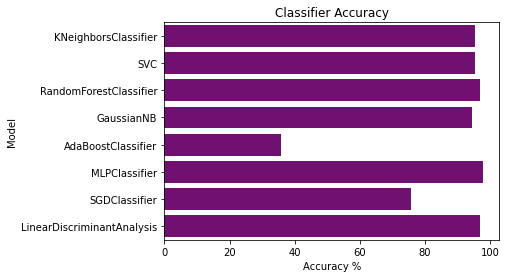

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y='Model', x='Accuracy', data=L, color="purple")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()



In [41]:
L.head(8)


,Model,Accuracy
0,KNeighborsClassifier,95.454545
0,SVC,95.454545
0,RandomForestClassifier,96.969697
0,GaussianNB,94.444444
0,AdaBoostClassifier,35.858586
0,MLPClassifier,97.979798
0,SGDClassifier,75.757576
0,LinearDiscriminantAnalysis,96.969697
